In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

,title,latitude,longitude
2,Bhopal,23.259900,77.412600
3,Agartala,23.831500,91.286800
4,Delhi,28.563200,77.191200
5,Bhuj,23.242000,69.666900
6,Chennai,13.082700,80.270700
7,Panaji,15.490900,73.827800
8,Gopalpur,19.264700,84.862000
9,Hyderabad,17.385000,78.486700
10,Jaipur,26.912400,75.787300
11,Kolkata,22.572600,88.363900


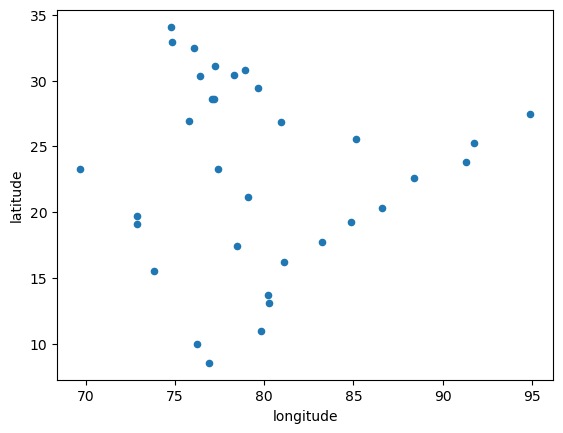

In [2]:
url = "https://mausam.imd.gov.in/imd_latest/contents/index_radar.php"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# extract the relevant part of the HTML
images_html = soup.find_all("script")[-2].text.split("images: [")[0].split("],\n")[0]

# split the HTML into individual locations and extract the relevant information
locations = []
for image in soup.find_all("script")[-2].text.split("images: [")[0].split("],\n")[0].split("{")[1:]:
    location_dict = {}
    for line in image.split("\n"):
        if "title" in line:
            location_dict["title"] = line.split(": ")[-1].strip(',')
        elif "latitude" in line:
            location_dict["latitude"] = line.split(": ")[-1].strip(',')
        elif "longitude" in line:
            location_dict["longitude"] = line.split(": ")[-1].strip(',')
    locations.append(location_dict)

# create a DataFrame from the list of dictionaries
df = pd.DataFrame(locations)
df = df.dropna()
df['title'] = df['title'].str.strip(", ").str.strip('"')
df['longitude'] = df['longitude'].str.strip(", ").str.strip('longitude":')
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['title'].replace("Goa", "Panaji", inplace=True)
df.plot(kind='scatter', x='longitude', y='latitude')
df

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# make a request to the URL
url = "https://mausam.imd.gov.in/imd_latest/contents/imd-dwr-network.php"
response = requests.get(url)

# create a BeautifulSoup object
soup = BeautifulSoup(response.content, "html.parser")

# find the table on the page
table = soup.find("table")

# extract the table headers
headers = [header.text.strip() for header in table.find_all("th")]

# extract the table rows
rows = []
for row in table.find_all("tr")[1:]:
    cells = [cell.text.strip() for cell in row.find_all("td")]
    rows.append(cells)

# create a DataFrame from the table data
df2 = pd.DataFrame(rows, columns=headers)
df2.drop("S No", axis=1, inplace=True)
df2['Type of DWR'] = df2['Type of DWR'].str.replace(' - Band', '')
df2['DWR Station'].replace('Delhi (Palam)', 'Palam', inplace=True)
df2['DWR Station'] = df2['DWR Station'].str.replace('\(ISRO\)', '').str.replace('\(Mausam Bhawan\)', 
                                                                                '').str.strip()


df2

/var/folders/yq/7n9vj93d6bq4gq64hx_6qgym0000gp/T/ipykernel_21399/3658484605.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['DWR Station'] = df2['DWR Station'].str.replace('\(ISRO\)', '').str.replace('\(Mausam Bhawan\)',


,DWR Station,State,Type of DWR
0,Agartala,Tripura,S
1,Bhopal,Madhya Pradesh,S
2,Bhuj,Gujarat,S
3,Chennai,Tamil Nadu,S
4,Cherrapunjee,Meghalaya,S
5,Palam,Delhi,S
6,Panaji,Goa,S
7,Gopalpur,Odisha,S
8,Hyderabad,Telangana,S
9,Jaipur,Rajasthan,C


In [4]:
merged_df = df.merge(df2, left_on='title', right_on='DWR Station', how='left')
merged_df = merged_df.drop(columns=['DWR Station'])
merged_df = merged_df.rename(columns={'Type of DWR': 'Band'})
merged_df['title'].replace("Goa", "Panaji", inplace=True)
num_nans = merged_df['Band'].isna().sum()
print(num_nans)
merged_df

10


,title,latitude,longitude,State,Band
0,Bhopal,23.259900,77.412600,Madhya Pradesh,S
1,Agartala,23.831500,91.286800,Tripura,S
2,Delhi,28.563200,77.191200,NaN,NaN
3,Bhuj,23.242000,69.666900,Gujarat,S
4,Chennai,13.082700,80.270700,Tamil Nadu,S
5,Panaji,15.490900,73.827800,Goa,S
6,Gopalpur,19.264700,84.862000,Odisha,S
7,Hyderabad,17.385000,78.486700,Telangana,S
8,Jaipur,26.912400,75.787300,Rajasthan,C
9,Kolkata,22.572600,88.363900,West Bengal,S


In [5]:
import cartopy.io.shapereader as shpreader
import geopandas as gpd
# Load the Natural Earth dataset
states_shp = shpreader.natural_earth(resolution='10m',
                                     category='cultural',
                                     name='admin_1_states_provinces')

/Users/syed44/miniconda3/envs/pcf1/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/Users/syed44/miniconda3/envs/pcf1/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


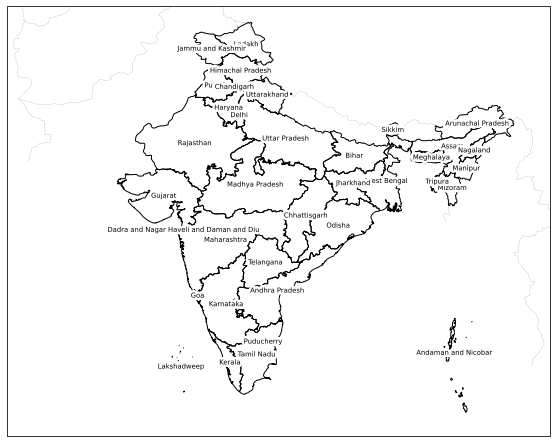

In [6]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as feat

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

# get the data
fn = shpreader.natural_earth(
    resolution='10m', category='cultural', 
    name='admin_1_states_provinces',
)
reader = shpreader.Reader(fn)
states = [x for x in reader.records() if x.attributes["admin"] == "India"]
states_geom = feat.ShapelyFeature([x.geometry for x in states], ccrs.PlateCarree())

data_proj = ccrs.PlateCarree()

# create the plot
fig, ax = plt.subplots(
    figsize=(10,10), dpi=70, facecolor="w",
    subplot_kw=dict(projection=data_proj),
)

ax.add_feature(feat.BORDERS, color="k", lw=0.1)
# ax.add_feature(feat.COASTLINE, color="k", lw=0.2)
ax.set_extent([60, 100, 5, 35], crs=ccrs.Geodetic())

ax.add_feature(states_geom, facecolor="none", edgecolor="k")

# # add the names
for state in states:
    lon = state.geometry.centroid.x
    lat = state.geometry.centroid.y
    name = state.attributes["name"] 
    
    ax.text(
        lon, lat, name, size=7, transform=data_proj, ha="center", va="center",
        path_effects=[PathEffects.withStroke(linewidth=5, foreground="w")]
    )                                  

In [7]:
locs = {}
for state in states:
    lon = state.geometry.centroid.x
    lat = state.geometry.centroid.y
    name = state.attributes["name"]
    locs[name] = {"lat": lat, "lon": lon}
gdf = pd.DataFrame(locs, ).T
gdf.reset_index(inplace=True)
gdf = gdf.rename({'index':'state'}, axis=1)
gdf.index = np.arange(1, len(gdf) + 1)

In [8]:
gdf

,state,lat,lon
1,Ladakh,33.885957,77.634965
2,Arunachal Pradesh,28.035900,94.660514
3,Sikkim,27.572023,88.448173
4,West Bengal,23.805249,87.972564
5,Assam,26.356938,92.831287
6,Uttarakhand,30.163721,79.196121
7,Nagaland,26.059820,94.448403
8,Manipur,24.730388,93.861591
9,Mizoram,23.292031,92.819139
10,Tripura,23.754753,91.728537


In [9]:
# merged_df.sort_values(by=['latitude', 'longitude'], ascending=False)

In [10]:
merged_df = df.merge(df2, left_on='title', right_on='DWR Station', how='left')
merged_df = merged_df.drop(columns=['DWR Station'])
merged_df = merged_df.rename(columns={'Type of DWR': 'Band'})
merged_df

,title,latitude,longitude,State,Band
0,Bhopal,23.259900,77.412600,Madhya Pradesh,S
1,Agartala,23.831500,91.286800,Tripura,S
2,Delhi,28.563200,77.191200,NaN,NaN
3,Bhuj,23.242000,69.666900,Gujarat,S
4,Chennai,13.082700,80.270700,Tamil Nadu,S
5,Panaji,15.490900,73.827800,Goa,S
6,Gopalpur,19.264700,84.862000,Odisha,S
7,Hyderabad,17.385000,78.486700,Telangana,S
8,Jaipur,26.912400,75.787300,Rajasthan,C
9,Kolkata,22.572600,88.363900,West Bengal,S


In [11]:
from math import radians, sin, cos, sqrt, asin

# Function to calculate the haversine distance between two coordinates in km
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R*c

# Loop through each row in merged_df
for i, row in merged_df.iterrows():
    if pd.isna(row["State"]):
        min_dist = float('inf')
        closest_state = ""
        # Loop through each row in gdf to find the closest one
        for j, gdf_row in gdf.iterrows():
            dist = haversine(row["latitude"], row["longitude"], gdf_row["lat"], gdf_row["lon"])
            if dist < min_dist:
                min_dist = dist
                closest_state = gdf_row["state"]
        merged_df.at[i, "State"] = closest_state

In [12]:
merged_df.sort_values(by = "latitude", ascending=False)

,title,latitude,longitude,State,Band
19,Srinagar,34.083656,74.797371,Jammu and Kashmir,X
20,Jammu,32.926600,74.857000,Jammu and Kashmir,NaN
26,Jot,32.486800,76.059300,Himachal Pradesh,NaN
31,Kufri,31.097800,77.267800,Chandigarh,NaN
27,Murari,30.789800,78.917850,Uttarakhand,NaN
32,Surkandaji,30.411400,78.288500,Uttarakhand,NaN
17,Patiala,30.339800,76.386900,Punjab,S
29,Mukteshwar,29.460400,79.655800,Uttarakhand,NaN
28,Palam,28.590100,77.088800,Delhi,S
2,Delhi,28.563200,77.191200,Delhi,NaN


In [13]:
# Merge merged_df and df2 on the "State" column
merged_df_with_band = pd.merge(merged_df, df2[['State', 'Type of DWR']], on='State', how='left')

# Replace NaN values in the "Band" column with corresponding values from the "Type of DWR" column
merged_df_with_band['Band'].fillna(merged_df_with_band['Type of DWR'], inplace=True)

# Drop the "Type of DWR" column
merged_df_with_band.drop('Type of DWR', axis=1, inplace=True)


In [14]:
merged_df_with_band.drop(2, inplace=True)

In [15]:
merged_df_with_band.drop_duplicates("latitude", inplace=True)
merged_df_with_band.drop_duplicates("longitude", inplace=True)
merged_df_with_band.sort_values(by="latitude", ascending=False, inplace=True)

In [16]:
merged_df_with_band.index = np.arange(1, len(merged_df_with_band)+1, 1)

In [17]:
f_df = merged_df_with_band.copy()

In [18]:
f_df.loc[f_df['title'] == 'Veravali', 'Band'] = 'C'

In [19]:
nan_mask = f_df['Band'].isna()
nan_df = f_df[nan_mask]
nan_df.loc[:, 'Band'] = nan_df['Band'].fillna('X')
f_df.update(nan_df)

/var/folders/yq/7n9vj93d6bq4gq64hx_6qgym0000gp/T/ipykernel_21399/1355819478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_df.loc[:, 'Band'] = nan_df['Band'].fillna('X')


In [20]:
f_df.rename(columns={'title': 'Site',
                     "latitude": "Latitude", 
                     "longitude":"Longitude"}, inplace=True)

In [30]:
f_df.attrs["Range"]={"C":250,
                    "X":100,
                    "S":250
                   }

In [39]:
f_df.to_csv("IMD_Radar_Sites_2022.csv")